## Boosted Regression 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor

%matplotlib inline

### Generate data

In [2]:
# create the dataset
rng = np.random.RandomState(1)
X = np.linspace(0, 6, 100)[:, np.newaxis]
y = np.sin(X).ravel() + np.sin(6 * X).ravel() + rng.normal(0, 0.1, X.shape[0])

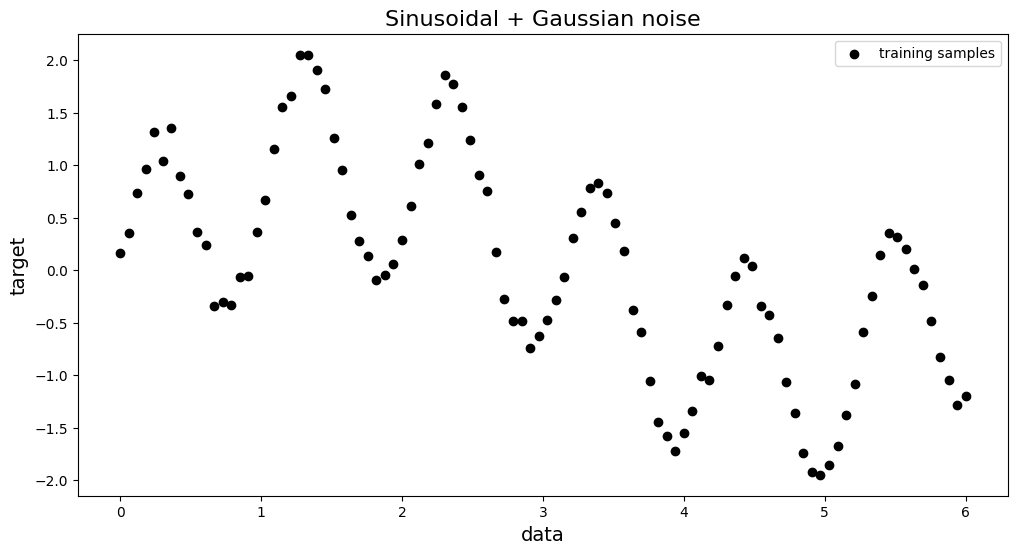

In [3]:
# plot the results
plt.figure(figsize = (12, 6))
plt.scatter(X, y, c = "k", label = "training samples")
plt.xlabel("data", size = 14)
plt.ylabel("target", size = 14)
plt.title("Sinusoidal + Gaussian noise", size = 16)
plt.legend()
plt.show()

### Train Models

In [4]:
# fit regression models
tr1 = DecisionTreeRegressor(max_depth = 4)
tr2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth = 6), n_estimators = 20, random_state = rng)
tr3 = AdaBoostRegressor(DecisionTreeRegressor(max_depth = 6), n_estimators = 200, random_state = rng)
tr4 = GradientBoostingRegressor(n_estimators = 20, random_state = rng)
tr5 = GradientBoostingRegressor(n_estimators = 200, random_state = rng)
models = [tr1,tr2,tr3,tr4,tr5]

In [5]:
def fit_predict_score(model, X, y):
    model.fit(X, y)
    y_hat = model.predict(X)
    print(" Model:" ,model.__class__.__name__ , " Score:" , model.score(X,y))
    return y_hat

In [6]:
y_hat = []

for m in models:
    y_hat.append(fit_predict_score(m, X, y))

 Model: DecisionTreeRegressor  Score: 0.8569240975984329
 Model: AdaBoostRegressor  Score: 0.9938767101443421
 Model: AdaBoostRegressor  Score: 0.9971960646938036
 Model: GradientBoostingRegressor  Score: 0.8644309615371273
 Model: GradientBoostingRegressor  Score: 0.9996695748833906


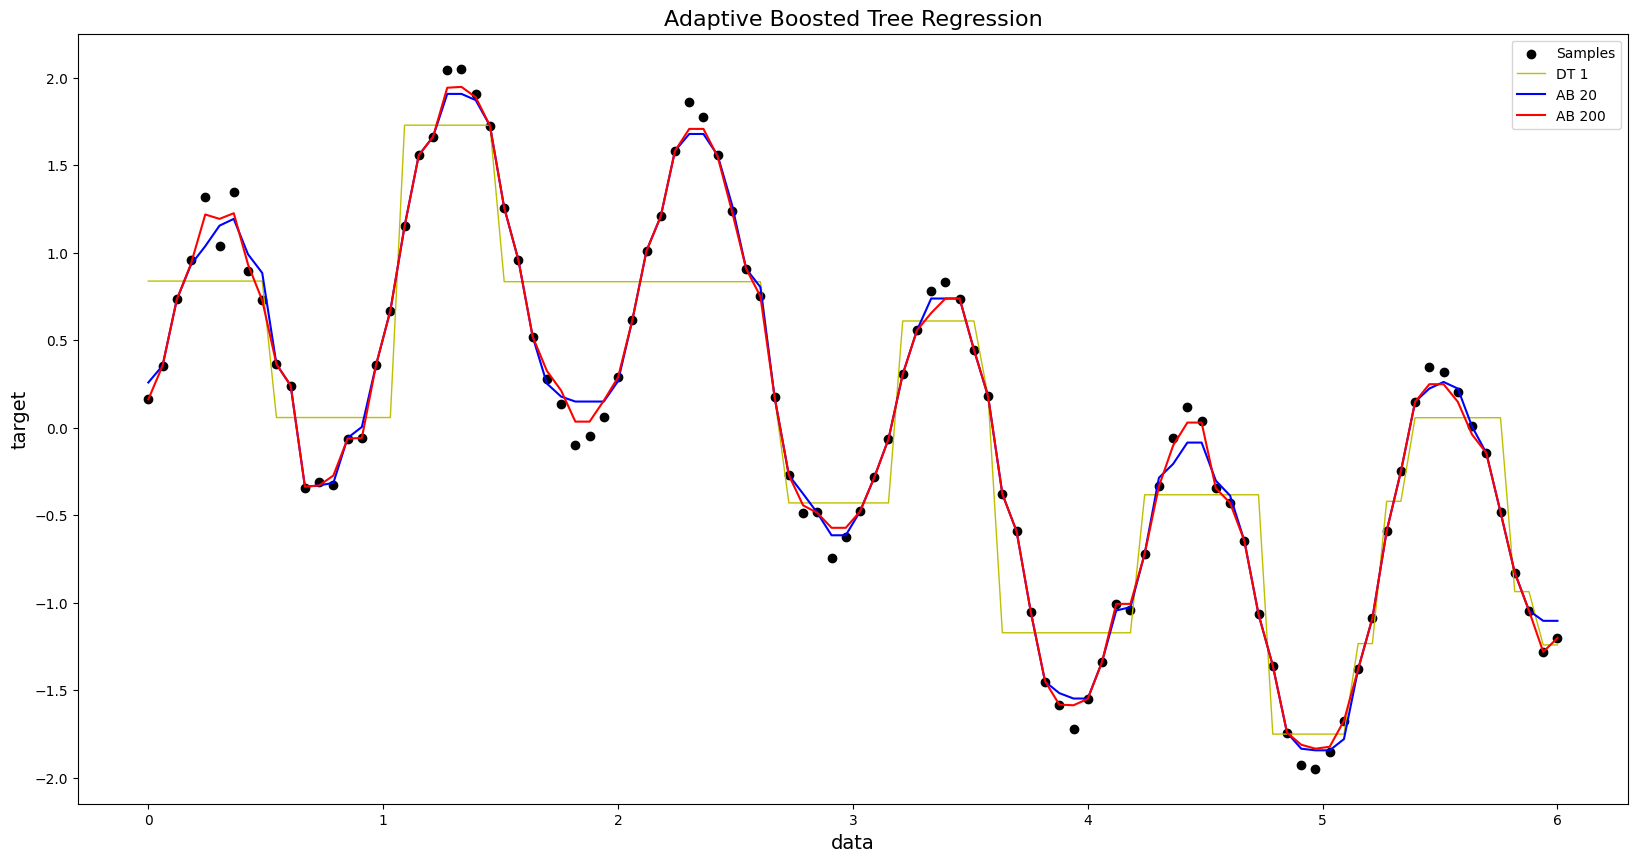

In [7]:
# plot the results
plt.figure(figsize = (20,10))
plt.scatter(X, y, c = "k", label = "Samples")
plt.plot(X, y_hat[0], c = "y", label = "DT 1", linewidth = 1)
plt.plot(X, y_hat[1], c = "b", label = "AB 20", linewidth = 1.5)
plt.plot(X, y_hat[2], c = "r", label = "AB 200", linewidth = 1.5)
plt.xlabel("data", size = 14)
plt.ylabel("target", size = 14)
plt.title("Adaptive Boosted Tree Regression", size = 16)
plt.legend()
plt.show()

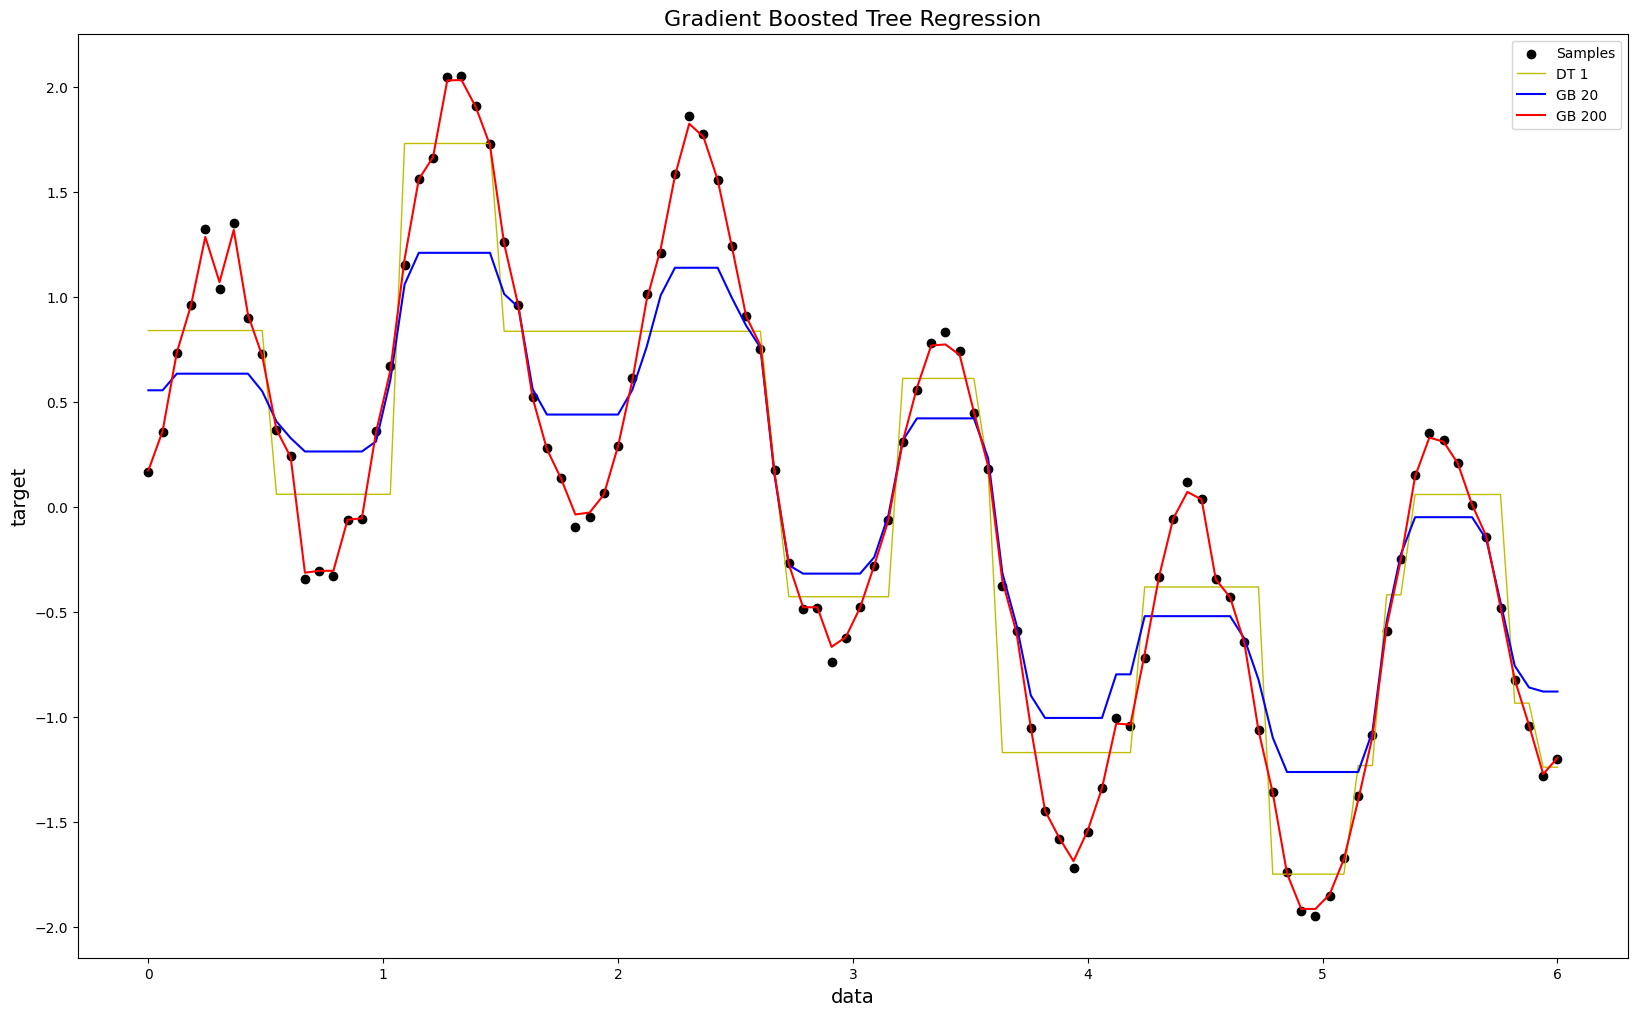

In [8]:
# plot the results
plt.figure(figsize = (20, 12))
plt.scatter(X, y, c = "k", label = "Samples")
plt.plot(X, y_hat[0], c = "y", label = "DT 1", linewidth = 1)
plt.plot(X, y_hat[3], c = "b", label = "GB 20", linewidth = 1.5)
plt.plot(X, y_hat[4], c = "r", label = "GB 200", linewidth = 1.5)
plt.xlabel("data", size = 14)
plt.ylabel("target", size = 14)
plt.title("Gradient Boosted Tree Regression", size = 16)
plt.legend()
plt.show()